In [36]:
#Names: Kevin Quach, Stephan Ng, Andrew Stevenson
%pylab inline
from numpy import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


a:   14.0218217422 +/- 1.53511959727
b:   2.44051499676 +/- 0.0433393855913


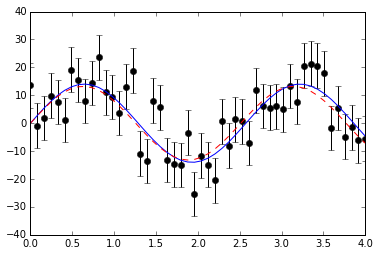

In [37]:
from scipy.optimize import curve_fit
sigma = 8
true_a = 13.2
true_b = 2.5

values = loadtxt ('reducedJohnson.txt')

# this is the function we want to fit to the data:
def func(x, a, b):
    return a*np.sin(b*x)

# here we make "fake" data for fitting by calculating the function and adding some Gaussian noise
x  = np.linspace(0,4,50)    # this is the range in x, sampled by 50 data points
y  = func(x, true_a, true_b) # this is the "true" calculated value of y at each x point
yn = y + sigma*np.random.normal(size=len(x)) # this adds a noise factor (gaussian with width sigma) to simulator measurement error.
sy = zeros(50) + sigma;       # this is the uncertainty on each y measurement (sigma)
yn = y + sigma*np.random.normal(size=len(x))
errorbar(x,yn, sy, color="black", fmt="o")

# this is the curve fitting step:
approx = [10, 2]   # this is our initial guess for the parameters
# now we perform a least squared fit of the function func to the data (x,yn+/-sy)
popt, pcov = curve_fit(func, x, yn, p0=approx, sigma=sy)  

# Plot the fitted value of the function
yfit =func(x, popt[0], popt[1])
plot(x,yfit, "b")

# Compare to the "true" value:
ytrue =func(x, true_a, true_b)
plot(x,ytrue, "r", linestyle="--")

# Report fitted parameters:
print "a:  ", popt[0], "+/-", sqrt(pcov[0][0])
print "b:  ", popt[1], "+/-", sqrt(pcov[1][1])



In [38]:
# Exercise:  Find the Higgs Boson!  (To be discussed in class)
from scipy.stats import norm
import itertools
true_mh    = 125
res_mh     = 3
bkg_lambda = 50

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

sig = random.normal(true_mh,res_mh, 100)
bkg = random.exponential(bkg_lambda, 10000)
mgg = []
for x in itertools.chain(sig, bkg):
    mgg.append(x)
    
    
def expon(x, a, b, c, d, sigma): 
    return b*exp(-a*x) + gaus(x, c, d, sigma)

def linear(x, a, b):

h,xe = histogram(mgg, 50, (0.0, 200.0))
guesses = [(1/50), 750, 100, 125, 17]

popt, pcov = curve_fit(expon, xe, append(h,10), p0= guesses)                   
plot(xe, append(h,0), drawstyle='steps-post')
#plot(mu, phi)

# Plot the fitted value of the function
yfit =expon(xe, popt[0], popt[1], popt[2] , popt[3], popt[4])
plot(xe,yfit, "r")

# Report fitted parameters:
print "a:  ", popt[0], "+/-", sqrt(pcov[0][0])
print "b:  ", popt[1], "+/-", sqrt(pcov[1][1])




IndentationError: expected an indented block (<ipython-input-38-45a83206c87a>, line 23)

[  3.00000000e+02   1.00000000e+03   3.00000000e+03   6.00000000e+03
   1.00000000e+04   3.00000000e+04   6.00000000e+04   1.00000000e+05
   5.00000000e+05   1.00000000e+06]


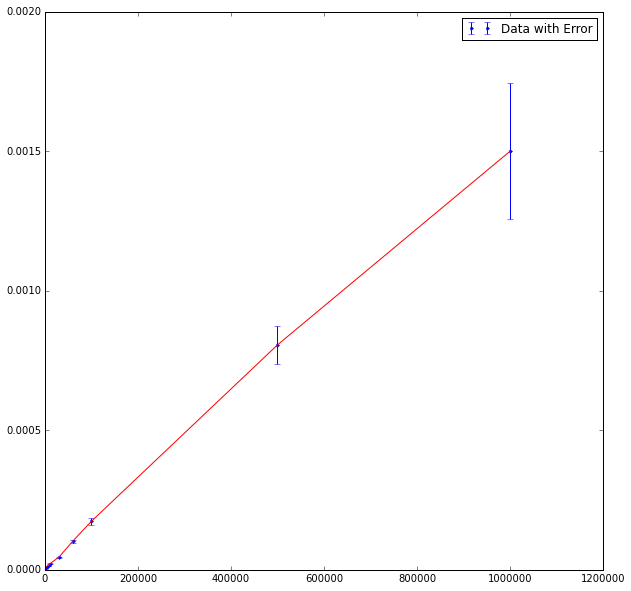

[  3.95480018e-07   3.67659263e-07   1.68835094e-06   9.91127304e-07
   1.83169624e-06   1.72549510e-06   5.42447130e-06   1.19256959e-05
   6.89751163e-05   2.43315172e-04]


In [39]:
values = loadtxt ('reducedJohnson.txt')
print values[:,0]
figure (figsize =(10,10))
errorbar(values[:,0], values[:,1], values[:,2], fmt = 'b.', label = 'Data with Error')
plot(values[:,0],values[:,1], 'r')
legend()
xlim(0, 1200000)
ylim(0, .002)
show()
print values[:,2]

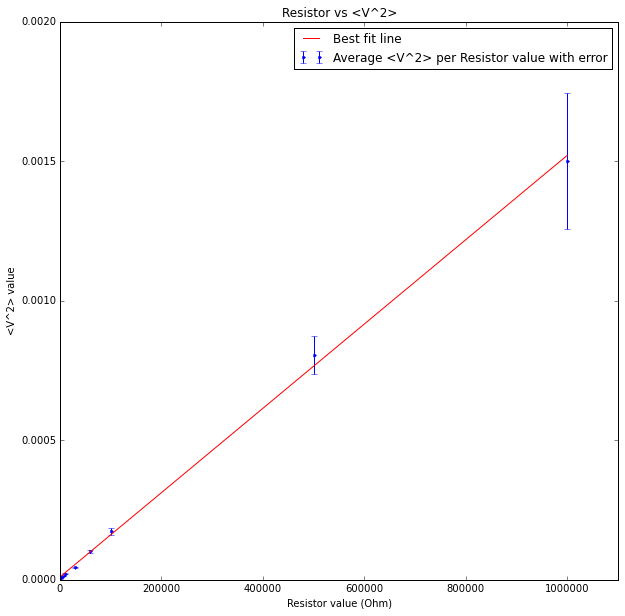

a:   1.51118285381e-09 +/- 1.7827566788e-11
b:   1.00353965132e-05 +/- 6.33981516637e-06


In [75]:
from scipy.optimize import curve_fit


# Exercise:  Find the Higgs Boson!  (To be discussed in class)
from scipy.stats import norm
import itertools
true_mh    = 125
res_mh     = 3
bkg_lambda = 50

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

sig = random.normal(true_mh,res_mh, 100)
bkg = random.exponential(bkg_lambda, 10000)
mgg = []
for x in itertools.chain(sig, bkg):
    mgg.append(x)
    
    
def expon(x, a, b, c, d, sigma): 
    return b*exp(-a*x) + gaus(x, c, d, sigma)

def linear(x, a, b):
    return a*x + b

#h,xe = histogram(mgg, 50, (0.0, 200.0))
h, xe = histogram(values[:,0], values[:,1])
#guesses = [(1/50), 750, 100, 125, 17]
guesses = [(1/5000000), 0]

#popt, pcov = curve_fit(expon, xe, append(h,10), p0= guesses)      
popt, pcov = curve_fit(linear, values[:,0], values[:,1], p0= guesses)
#plot(values[:,0], values[:,1], drawstyle='steps-post')
figure(figsize=(10,10))
errorbar(values[:,0], values[:,1], values[:,2], fmt = 'b.', label = 'Average <V^2> per Resistor value with error')
#plot(mu, phi)

# Plot the fitted value of the function
yfit =linear(values[:,0], popt[0], popt[1])
plot(values[:,0],yfit, "r", label = 'Best fit line')
legend()
xlabel('Resistor value (Ohm)')
ylabel('<V^2> value')
title('Resistor vs <V^2>')
xlim(0, 1100000)
ylim(0, .002)
show()

# Report fitted parameters:
print "a:  ", popt[0], "+/-", sqrt(pcov[0][0])
print "b:  ", popt[1], "+/-", sqrt(pcov[1][1])




In [41]:
sumR = 0
sumV = 0
avgR = 0
avgV = 0

for i in range(len(values[:,0])):
    sumR = sumR + values[i,0]
    sumV = sumV + values[i,1]
    
avgR = sumR/len(values[:,0])
avgV = sumV/len(values[:,0])

print 'Average value of R\t', avgR, '\tAverage value of <V^2>\t', avgV

numsl = 0
densl = 0
slope  = 0

for i in range(len(values[:,0])):
    numsl = numsl + (values[i,0] - avgR)*(values[i,1] - avgV)
    densl = densl + (values[i,0] -avgR)**2
    
slope = numsl/densl

why = 0
yint = 0

sux = sum(values[:,0])
suy = sum(values[:,1])
#print sux
#print suy
#print 1./len(values[:,0])
yint = (1./len(values[:,0])) * (suy - (slope*sux))
print 'Slope = \t', slope, '\tY-intercept = \t', yint 

Average value of R	171030.0 	Average value of <V^2>	0.000268493
Slope = 	1.51118285381e-09 	Y-intercept = 	1.00353965132e-05


In [42]:
#for i in range(len(values[:,0])):
    
chi2 = 0
chi3 = 0

In [68]:
new = loadtxt ('line.txt')
print new
guesses = [(1/5000000), 0]
stddevf = sqrt(new[:,1])
popx, pcoy = curve_fit(linear, new[:,0], new[:,1], p0= guesses)
yfit =linear(new[:,0], popx[0], popx[1])


figure(figsize=(10,10))
title('G( $$\nu$$ ) of JNFT and Voltage Divider')
xlabel('Frequency')
ylabel('Gain')

xlim(0,21000)
#plot(new[:,0], new[:,1], 'b.')
errorbar(new[:,0], new[:,1], stddevf, fmt = 'b.')
#plot(new[:,0],yfit, "r", label = 'Best fit line')
# Report fitted parameters:
print "a:  ", popx[0], "+/-", sqrt(pcoy[0][0])
print "b:  ", popx[1], "+/-", sqrt(pcoy[1][1])


[[   100.         8000.      ]
 [   300.         8000.      ]
 [   600.         7550.      ]
 [  1000.         7100.      ]
 [  1300.         7200.      ]
 [  2500.         6450.      ]
 [  5000.         5380.952381]
 [  7500.         5333.333333]
 [ 10000.         5168.539326]
 [ 13000.         4761.904762]
 [ 16000.         4238.095238]
 [ 20000.         2809.52381 ]]
a:   -0.229744429274 +/- 0.0209134988375
b:   7479.29943607 +/- 192.401346596


ValueError: 
G( $$
   ^
Expected end of text (at char 3), (line:1, col:4)

In [70]:
from scipy import *
from IPython.external.mathjax import install_mathjax
install_mathjax()

C:\Users\Stephan\AppData\Roaming\SPB_16.6\.ipython\nbextensions\mathjax\MathJax.js already exists


0

In [45]:
#inv = []
#for i in range(len(new[:,1])):
#    inv.append(new[i,1]**-1)
    
#print inv

In [58]:
x = 5381**2 
print x
y = x * 7000
print y

28955161
202686127000


In [57]:
k = ((popt[0])/(4*298*y))
print k

6.25484767643e-24


[[   100.         8000.      ]
 [   300.         8000.      ]
 [   600.         7550.      ]
 [  1000.         7100.      ]
 [  1300.         7200.      ]
 [  2500.         6450.      ]
 [  5000.         5380.952381]
 [  7500.         5333.333333]
 [ 10000.         5168.539326]
 [ 13000.         4761.904762]
 [ 16000.         4238.095238]
 [ 20000.         2809.52381 ]]
a:   -0.229744429274 +/- 0.0209134988375
b:   7479.29943607 +/- 192.401346596


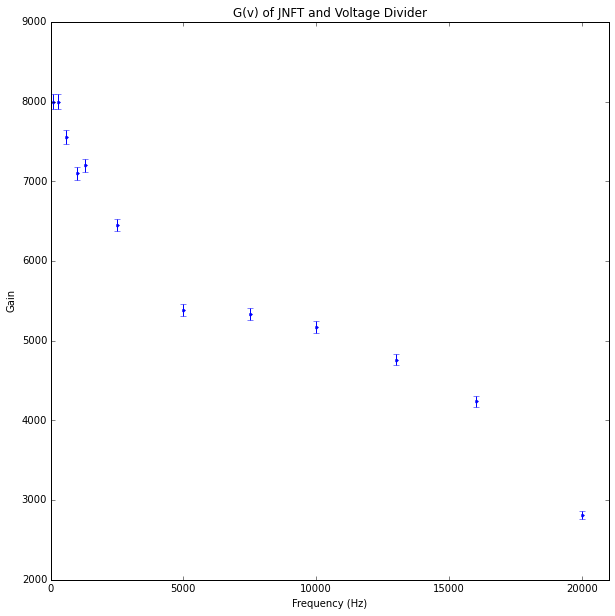

In [73]:
new = loadtxt ('line.txt')
print new
guesses = [(1/5000000), 0]
stddevf = sqrt(new[:,1])
popx, pcoy = curve_fit(linear, new[:,0], new[:,1], p0= guesses)
yfit =linear(new[:,0], popx[0], popx[1])


figure(figsize=(10,10))
title('G(v) of JNFT and Voltage Divider')
xlabel('Frequency (Hz)')
ylabel('Gain')

xlim(0,21000)
#plot(new[:,0], new[:,1], 'b.')
errorbar(new[:,0], new[:,1], stddevf, fmt = 'b.')
#plot(new[:,0],yfit, "r", label = 'Best fit line')
# Report fitted parameters:
print "a:  ", popx[0], "+/-", sqrt(pcoy[0][0])
print "b:  ", popx[1], "+/-", sqrt(pcoy[1][1])